# k-means 클러스터링의 최적의 k값을 찾는 방법

1. 비즈니스 도메인 지식
    - 정성적인 선정 방법
    - 데이터적인 근거는 다소 부족하지만, 클러스터링 자체가 해석을 통한 비즈니스 인사이트 도출이 주 목적이기 때문에 많은 프로젝트에서 이 방법을 사용
    
2. 엘보우 기법(Elbow method)
    - 군집 내 중심점과 관측치 간 거리 합(Inertia value)이 급감하는 구간의 k개수를 선정
    - 군집의 수가 k개 였을 때보다 k+1개일 때 거리합이 급감했다는 것은 유사한 속성의 관측치들끼리 잘 묶였다는 것을 의미
    - 따라서 k가 더 증가해도 거리합이 별로 줄어들지 않을 때는 k를 더 증가시킬 필요가 없다는 의미
        - 이 때의 그래프 모양이 팔꿈치(Elbow) 형태를 하고 있기 때문에 엘보우 기법이라고 불림
        
3. 실루엣 계수(Silhouette coefficient) 활용
    - 실루엣 계수 : 군집 안의 관측치들이 다른 군집과 비교해서 얼마나 비슷한지를 나타내는 수치
    - 동일한 군집 안에 있는 관측치들 간의 평균 거리와 가장 가까운 다른 군집과의 평균 거리를 구해 실루엣 계수를 계산
    - $$ S(i) = \frac{b(i) - a(i)}{\max{a(i), b(i)}} $$
        - $ a(i) $ : i와 동일한 군집에 속한 관측치들 간의 평균 거리
        - $ b(i) $ : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
        
    - 동일한 군집 내 관측치들 간 평균 거리가 집단 간 평균 거리보다 짧을수록 실루엣 계수는 높아짐
        - 범위는 -1부터 1 사이의 값을 가지며 실루엣 계수가 1에 가까울수록 군집이 적합하게 나누어졌음을 의미

# DBSCAN

- 아무리 k값을 잘 지정한다고 해도 데이터의 형태가 k-means 클러스터링 알고리즘에 적합하지 않으면 효과적인 군집화를 할 수가 없음
- 밀도 기반의 원리를 이용한 클러스터링 기법이 DBSCAN(Density-based spatial clustering of applications with noise)
- DBSCAN 은 별도의 k값 지정이 필요 없고 관측치들의 밀도를 통해 자동으로 적절한 군집의 수를 찾음
    - 밀도를 측정하려면 두 가지 기준이 필요
        - 기준 관측치로부터 "이웃"한 관측치인지 구별할 수 있는 거리 기준(epsilon)이 필요
            - 거리 기준값이 크면 데이터 공간상 멀리 있는 관측치도 이웃한 관측치로 인식
            
        - 거리 기준 내에 포함된 이웃 관측치 수(minPts)에 대한 기준이 필요
            - 특정 거리 안에 몇 개 이상의 관측치가 있어야 하나의 군집으로 판단할 것인가를 결정
            
- 기준 밀도를 가진 관측치들을 기준으로 군집화를 하기 때문에 U자형 같이 오목한 데이터나 H와 같은 모양의 데이터 분포도 효과적으로 군집화할 수 있고 군집이 명확하지 않은 이상치를 잘 분류해낼 수 있음

- 단점
    - k-means에 비해 필요한 연산량이 많음
        - 특히 독립변수가 늘어날수록 필요한 연산량이 급증하기 때문에 변수를 적절히 설정해줘야 함
    - 데이터 특성을 모를 경우에는 적절한 파라미터 값을 설정하는 것이 어려움

# 군집화 모델 분석

- 군집화 모델은 분류된 각 군집의 특성을 파악하여 군집에 이름을 붙여서 그 특징을 정의하는 작업이 무엇보다 중요
    - 클러스터링에 사용한 독립변수들이 다른 군집들에 비해서 어떠한 특성을 가지고 있는지를 확인하여 각 군집을 명확하게 정의해야 함
    - 그 다음 각 군집의 특성에 맞는 비즈니스 전략을 수립
    
- 각 군집에 어느 정도의 데이터가 할당 되었는지 확인하여, 특정 군집에 너무 많은 데이터가 쏠렸거나 너무 적은 데이터가 할당되어 군집으로서 효율성이 떨어지는 군집은 없는지 확인
- 각 독립변수들이 다른 군집 혹은 전체 평균과 얼마나 다른지 확인하여 군집의 특성을 파악
    - 이를 통해 군집의 이름을 설정
    - 특성이 확실하여 쉽게 정의할 수 있는 군집도 있지만, 별다른 특성이 없는 군집도 있을 수 있음
        - 이 경우 무리해서 억지로 군집을 정의하기 보다는 비슷한 군집끼리 묶어서 "일반 고객" 등으로 별도 분류하는 것도 하나의 방법
        
- 군집 간의 수치적 차이를 보다 확실하게 파악하기 위해서는 t-test나 ANOVA 등을 통해 군집 간 평균값 차이가 우연한 차이인지, 통계적으로 유의미한 차이인지 검증하는 절차를 거치는 것이 좋음

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
df = pd.read_csv("./data/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop("CustomerID", axis = 1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


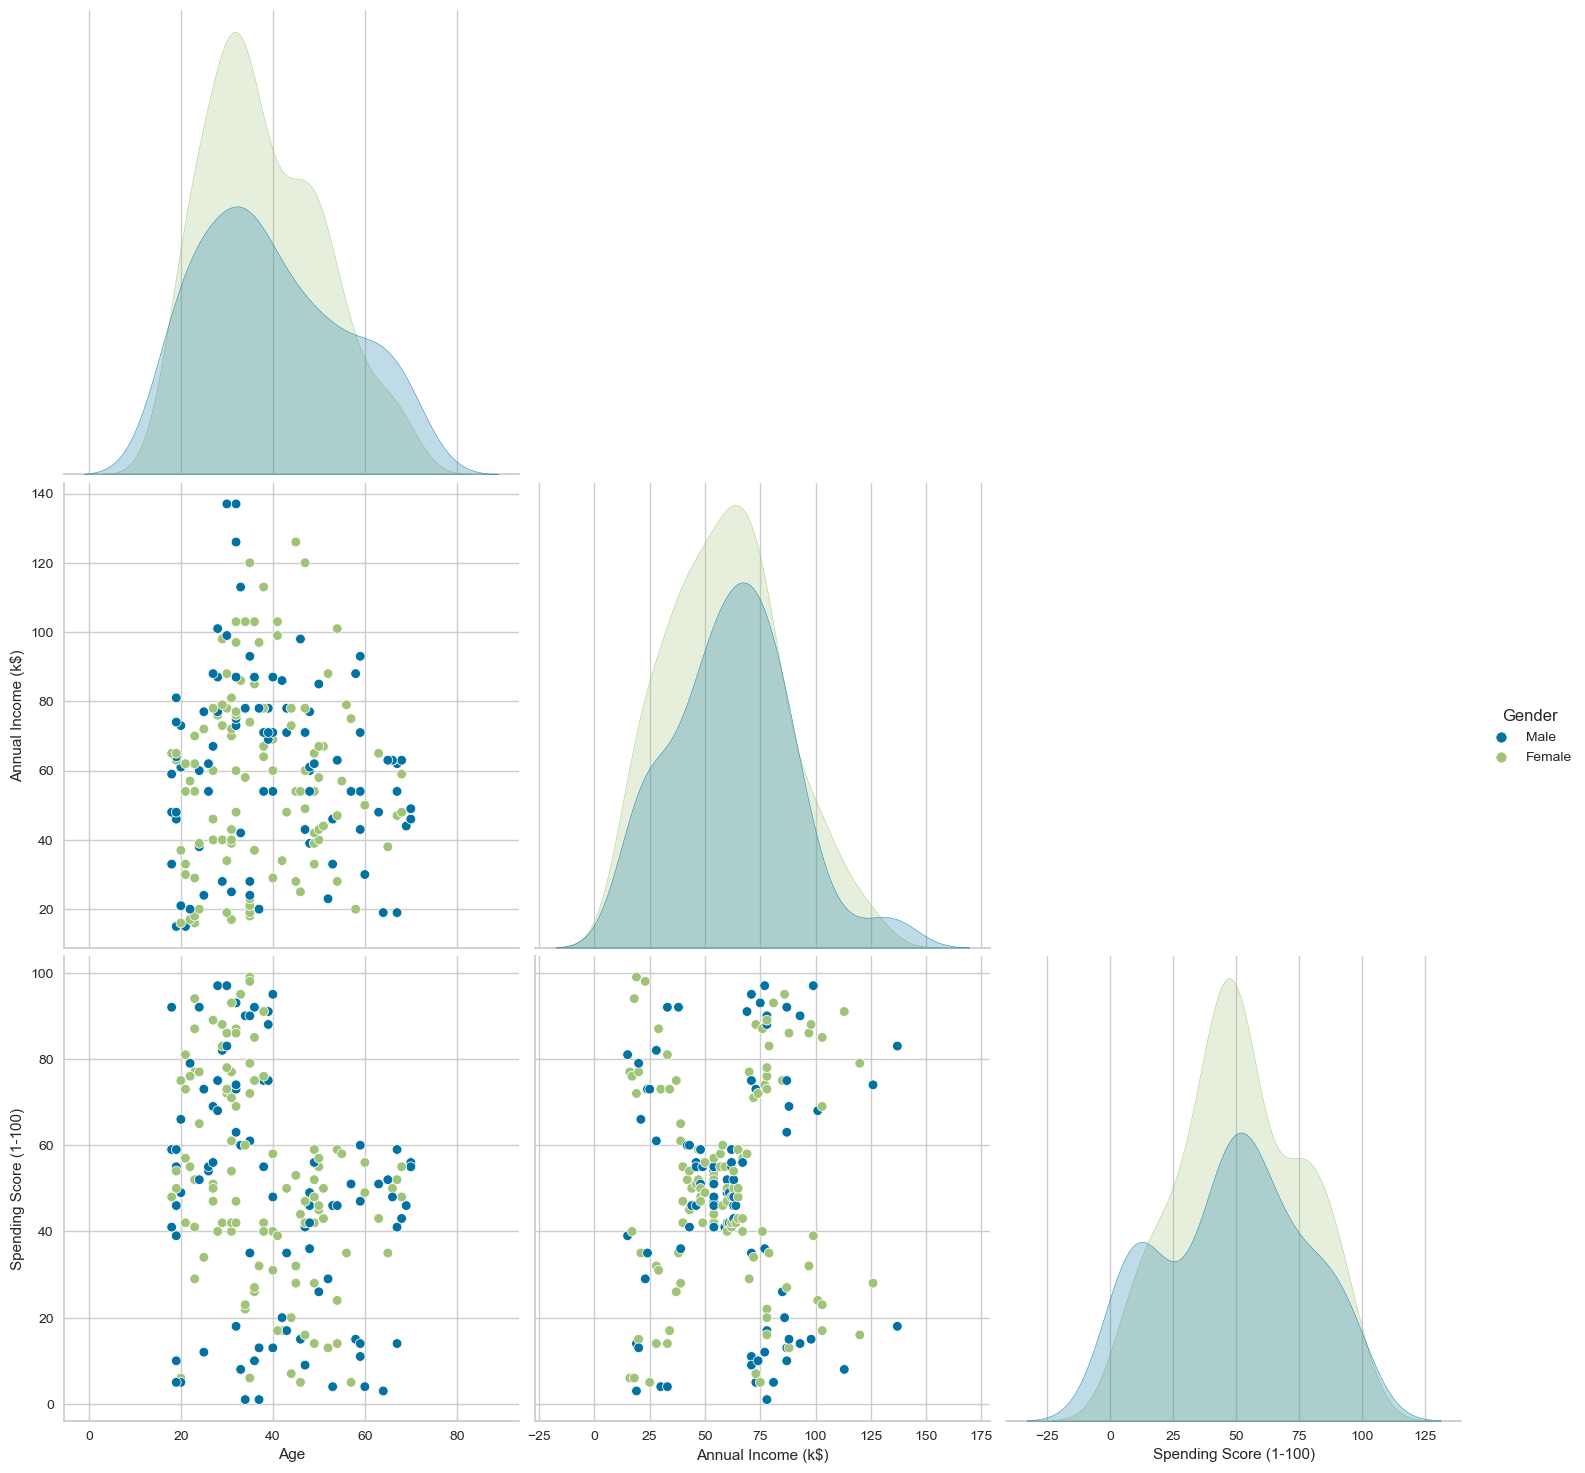

In [10]:
sns.pairplot(df1, diag_kind = "kde", # 대각선을 분포로 표시
            hue = "Gender", corner = True, height = 5)
plot_kws = {"s" : 100}

plt.show()

- 각 변수 간의 관계를 파악하기 위해 산점도 행렬을 시각화하여 분포를 확인
- spending score 변수와 annual income 변수와의 관계에서 약 5개 정도의 군집이 나눠질 수 있을 것으로 보임
    - 연령과 성별 변수도 함께 사용하여 군집화할 예정이므로 이러한 분포는 참고로만 사용

In [11]:
# 데이터 스케일링

# Gender 변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ["Gender"], drop_first = True)

In [12]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [13]:
# 정규화
mm = MinMaxScaler()
df_minmax = mm.fit_transform(df2)

In [16]:
df_minmax = pd.DataFrame(data = df_minmax, columns = df2.columns)
df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [17]:
# k-means 클러스터링 모델 생성
km_1 = KMeans(init = "k-means++", n_clusters = 3, n_init = 10, max_iter = 300, random_state = 11)

km_1.fit(df_minmax)

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=11)

In [18]:
# 최저 SSE 값
print(km_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(km_1.cluster_centers_)

# 반복 횟수
print(km_1.n_iter_)

29.552857611943857
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
5


C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

<Axes: >

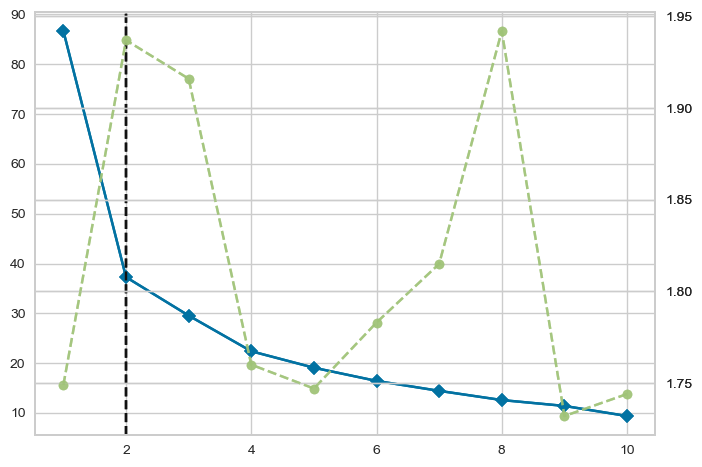

In [19]:
# 엘보우 차트 시각화
elbow_chart = KElbowVisualizer(km_1, k = (1, 11))
elbow_chart.fit(df_minmax)
elbow_chart.draw()

- k = 2 지점에서 경사가 급감하는 모습을 보이고 있음
    - 성별 변수 때문일 것으로 예상

In [20]:
# 실루엣 계수 시각화 1

# 각 k의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    km_silhouette = KMeans(n_clusters = k, random_state = 11)
    km_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, km_silhouette.labels_)
    silhouette_coef.append(score)

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

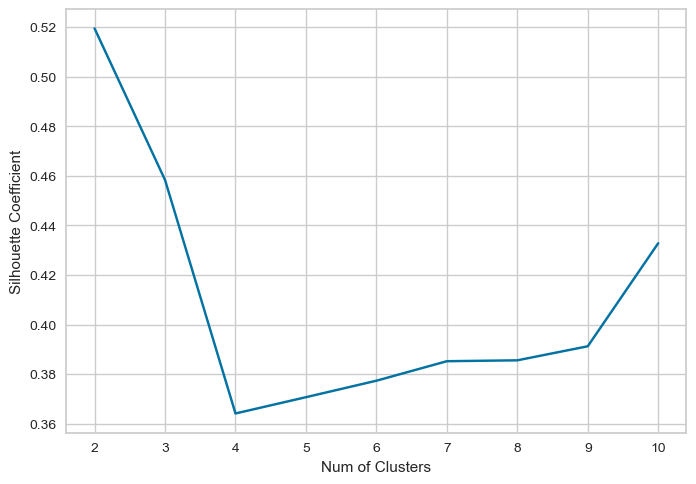

In [21]:
plt.plot(range(2, 11), silhouette_coef)

plt.xticks(range(2, 11))
plt.xlabel("Num of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

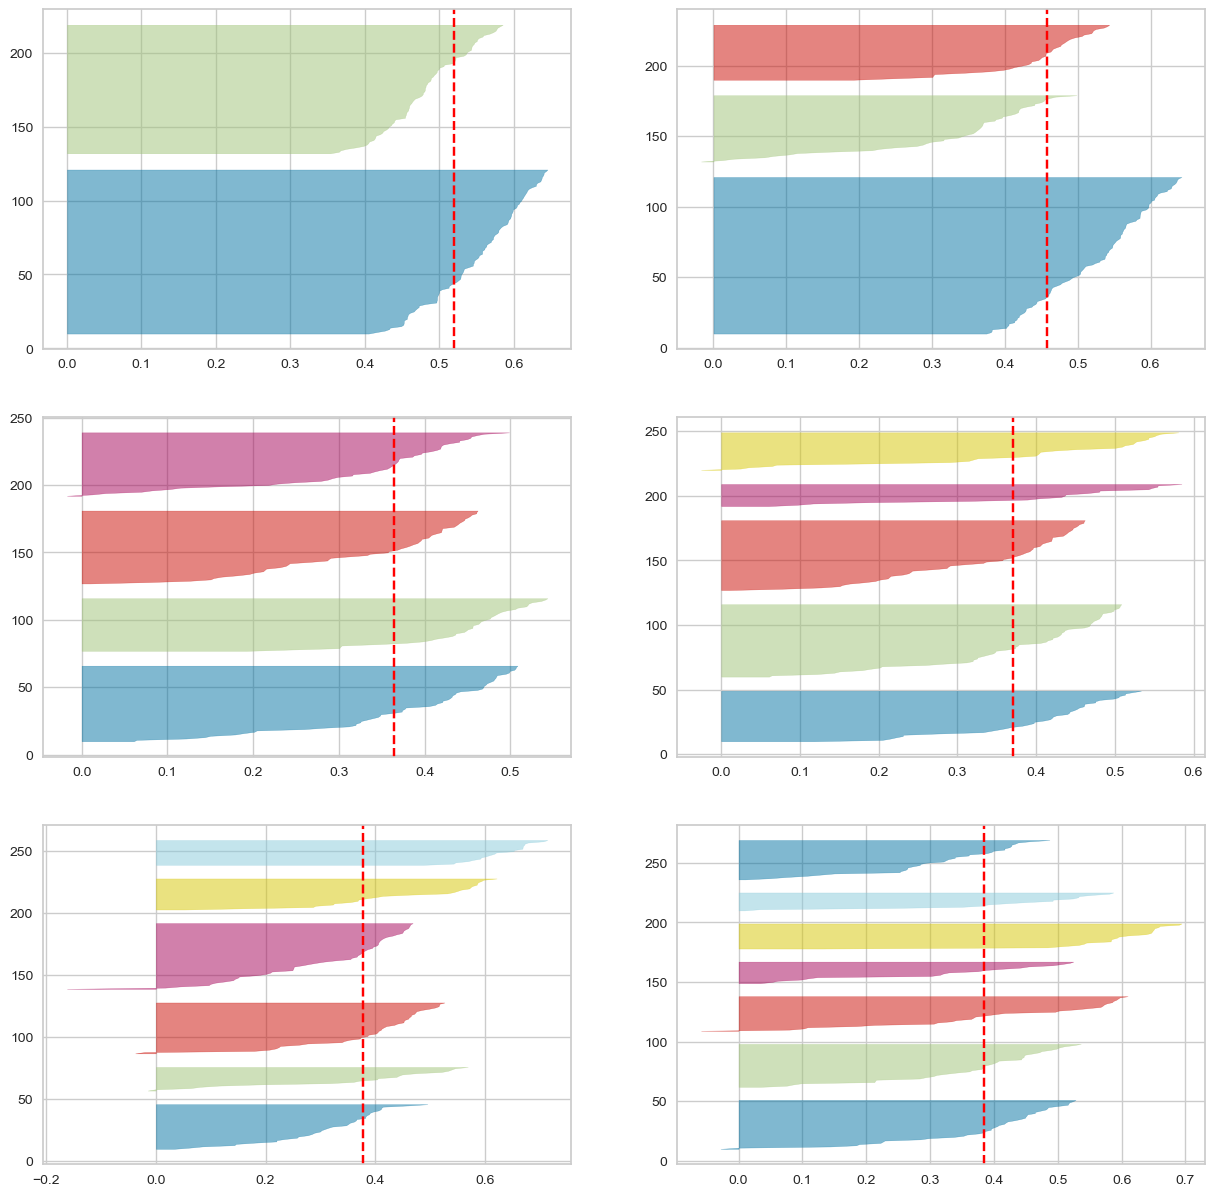

In [24]:
###### 실루엣 계수 시각화 2
fig, ax = plt.subplots(3, 2, figsize = (15, 15))

for i in [2, 3, 4, 5, 6, 7]:
    # k-means 클러스터링 모델 생성
    km_3 = KMeans(n_clusters = i, random_state = 11)
    q, mod = divmod(i, 2)
    
    # 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(km_3, colors = "yellowbrick", ax = ax[q-1][mod])
    visualizer.fit(df_minmax)

- 4개의 군집이 관측치가 비교적 균등하게 나뉘며 실루엣 계수의 편차도 고른 편
- 6개의 군집부터는 일부 실루엣 계수의 음수가 크게 나타남

In [27]:
# k-means 클러스터 시각화
km_4 = KMeans(n_clusters = 4, random_state = 11)

# 군집 번호 결합
df2["cluster1"] = km_4.fit_predict(df_minmax)

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster1
0,19,15,39,True,1
1,21,15,81,True,1
2,20,16,6,False,2
3,23,16,77,False,0
4,31,17,40,False,0


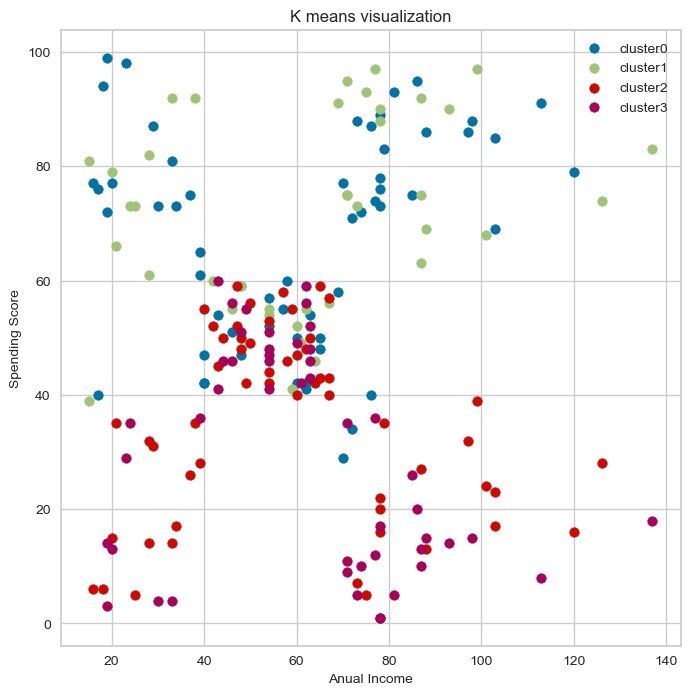

In [32]:
# 시각화 설정
plt.figure(figsize = (8, 8))

for i in range(df2["cluster1"].max() + 1):
    plt.scatter(df2.loc[df2["cluster1"] == i, "Annual Income (k$)"],
               df2.loc[df2["cluster1"] == i, "Spending Score (1-100)"],
               label= "cluster" + str(i))

plt.legend()
plt.title("K means visualization", size = 12)
plt.xlabel("Anual Income", size = 10)
plt.ylabel("Spending Score", size = 10)
plt.show()

In [33]:
# DBSCAN 모델 생성 및 시각화
dbscan = DBSCAN(eps = 0.7, min_samples = 5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
df2["cluster2"] = dbscan.fit_predict(df_minmax)

In [34]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster1,cluster2
0,19,15,39,True,1,0
1,21,15,81,True,1,0
2,20,16,6,False,2,1
3,23,16,77,False,0,1
4,31,17,40,False,0,1


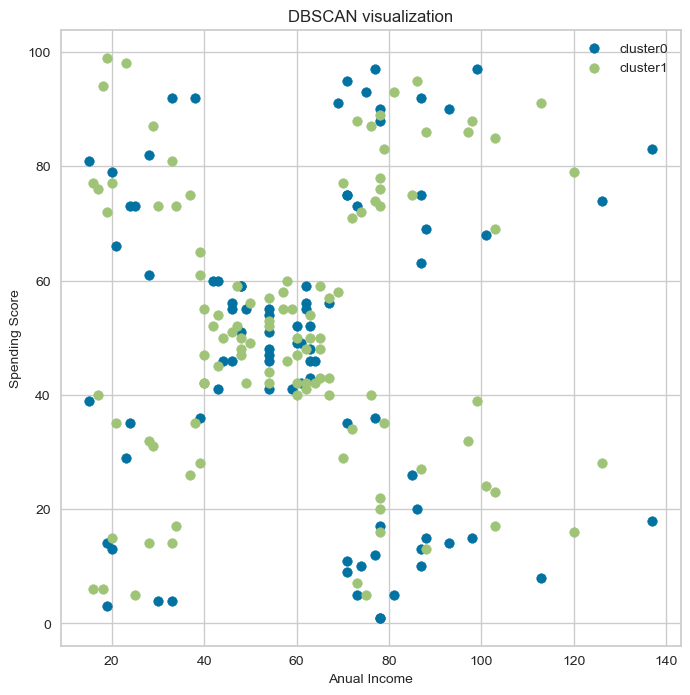

In [36]:
# 시각화 설정
plt.figure(figsize = (8, 8))

for i in range(df2["cluster2"].max() + 1):
    plt.scatter(df2.loc[df2["cluster2"] == i, "Annual Income (k$)"],
               df2.loc[df2["cluster2"] == i, "Spending Score (1-100)"],
               label= "cluster" + str(i))

plt.legend()
plt.title("DBSCAN visualization", size = 12)
plt.xlabel("Anual Income", size = 10)
plt.ylabel("Spending Score", size = 10)
plt.show()

- 밀도기반의 DBSCAN 모델은 군집 수가 자동으로 설정
    - 관측치 간의 거리를 설정하는 eps 옵션과 한 군집에 속하는 최소 관측치 수를 설정하는 min_samples 옵션을 통해 군집 수를 간접적으로 조정할 수 있음

In [37]:
# k-means 군집 별 특성 확인
df_kmeans = df2.groupby(["cluster1"]).agg({"Age" : "mean",
                                          "Annual Income (k$)" : "mean",
                                          "Spending Score (1-100)" : "mean",
                                          "Gender_Male" : "mean"}).reset_index()

df_kmeans["cnt"] = df2.groupby("cluster1")["Age"].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,28.438596,59.666667,67.684211,0.0,57
1,1,28.250000,62.000000,71.675000,1.0,40
2,2,48.109091,58.818182,34.781818,0.0,55
3,3,49.437500,62.416667,29.208333,1.0,48


In [38]:
# DBSCAN 군집 별 특성 확인
# k-means 군집 별 특성 확인
df_dbscan = df2.groupby(["cluster2"]).agg({"Age" : "mean",
                                          "Annual Income (k$)" : "mean",
                                          "Spending Score (1-100)" : "mean",
                                          "Gender_Male" : "mean"}).reset_index()

df_dbscan["cnt"] = df2.groupby("cluster2")["Age"].count()
df_dbscan.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112


- DBSCAN 모델의 경우 성별에 따라 두 개의 군집으로 나뉘어 졌음
- 성별이 범주형 변수이기 때문에 변별력이 강해서 다른 변수의 영향력을 압도한 것으로 보임
    - 비즈니스 적으로 의미 있는 군집을 만들기 위해서는 성별 변수를 제거하거나 다른 변수를 추가해야함